In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv("scroll.csv")

In [35]:
df.head()

,﻿pixel,percent
0,0,72.0
1,100,76.0
2,200,82.0
3,300,88.0
4,400,92.0


In [36]:
df.columns = ['pixel','percent']

In [37]:
df['pixel'].values

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000])

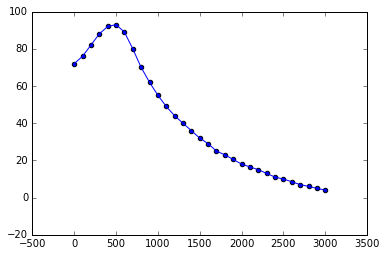

In [38]:
plt.scatter(df['pixel'].values,df['percent'].values)
plt.plot(df['pixel'].values,df['percent'].values)
plt.show()

In [39]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

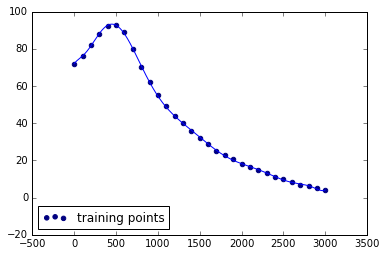

In [52]:
# generate points used to plot
x_plot = np.linspace(0, 3000, 3000)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = df['pixel'].values
y = df['percent'].values

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

plt.scatter(x, y, color='navy', marker='o', label="training points")

model = make_pipeline(PolynomialFeatures(11), Ridge())
model.fit(X, y)
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot)

plt.legend(loc='lower left')

plt.show()

In [53]:
print y_plot

[ 71.98060303  72.04252675  72.10346716 ...,   4.04774561   4.07125756
   4.09580608]


In [55]:
np.savetxt("scroll_interp.csv", np.transpose([x_plot, y_plot]))